Data breif:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10

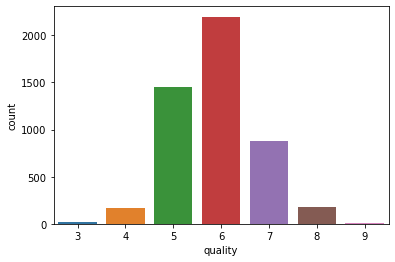

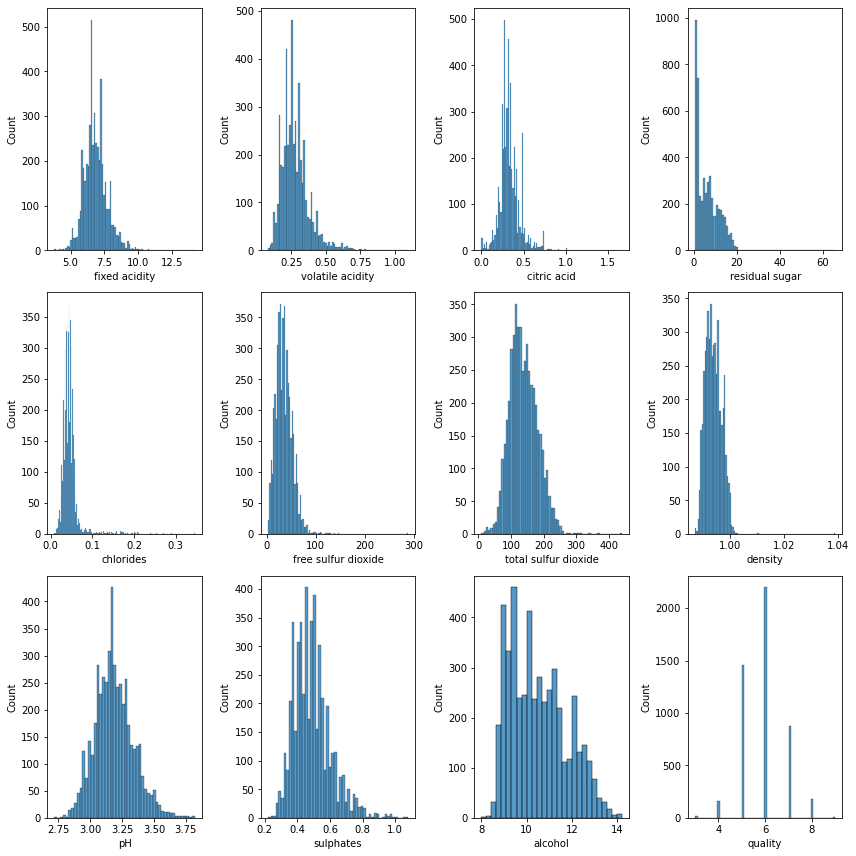

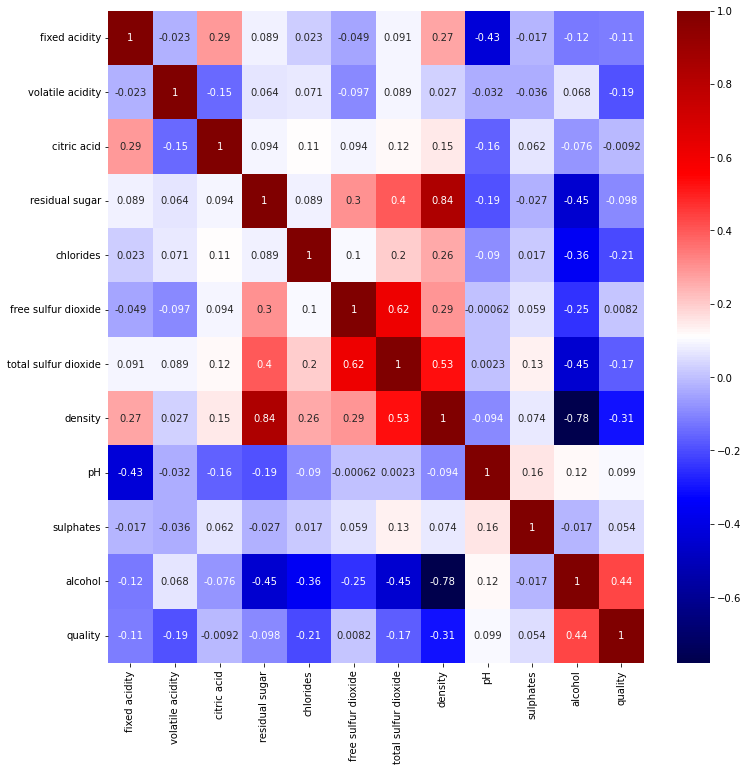

c:\Users\sungchan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train data: 0.8019397651863196
Test data: 0.786734693877551
회귀계수 :  [[-0.30668988 -2.96125818 -0.14943212  0.02305687 -0.52222949  0.00963245
  -0.00361596 -1.79232214 -1.16161467  1.49092317  0.77602299]]
y절편 :  [-1.93451677]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       759
           1       0.57      0.23      0.32       221

    accuracy                           0.79       980
   macro avg       0.69      0.59      0.60       980
weighted avg       0.75      0.79      0.75       980

Train data: 0.2471230146902481
Test data: 0.23908973289660196
회귀계수 :  [ 1.46818856e-01 -1.88210882e+00 -1.99806826e-02  9.32490704e-02
 -4.24288987e+00  4.77257070e-03  3.09076751e-04 -1.93787479e+02
  9.07505675e-01  7.31656198e-01  1.24371427e-01]
y절편 :  192.86520605182662
knn score: 0.7874213836477988
R2: 0.731475987807217
MSE: 0.19534444793960365
Accuracy: 0.8122050959421202


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import copy

class WhiteWine:
    def __init__(self):
        self.wineQuality=[]
         
    def setData(self, csvPath):
        import pandas as pd
        self.wineQuality = pd.read_csv(csvPath)
    
    def getData(self):
        try:
            return self.wineQuality
        except AttributeError:
            print("Error : Wine Quality data has not been set. ") 
    
    def removeOutlier(self):
        iqr = self.wineQuality
        for i in range(0,len(iqr.columns)-1):
            quantile_75 = np.quantile(iqr.iloc[:,i],0.75)#3분위수
            quantile_25 = np.quantile(iqr.iloc[:,i],0.25)#1분위수
            rangeOfIqr = quantile_75 - quantile_25 #iqr
            min = quantile_25 - 1.5 * rangeOfIqr #필터링한 최소값
            max = quantile_75 + 1.5 * rangeOfIqr #필터링한 최대값
            iqr = iqr[(iqr.iloc[:,i] >= min) & (iqr.iloc[:,i] <= max)] #최소 최대 사이에만 있는 값으로 필터링
        self.wineQuality = copy.deepcopy(iqr)
                                  
class EDA(WhiteWine):
    def briefData(self):
        try:
            print("Data breif:", self.getData().head())
            print("Data Shape:",  self.getData().shape)
            print("Data Information:", self.getData().info())
            print("Null Values:", self.getData().isnull().sum())
        except AttributeError:
            print("Error : Wine Quality data has not been set. ") 
            
    def checkValue(self, attribute='quality'):
        print(self.wineQuality[attribute].value_counts())
        sns.countplot(x=self.wineQuality[attribute]) 
        
    def getDistribute(self,figsize=(12,12)):
        plt.figure(figsize=figsize)
        for i in range(0,len(self.wineQuality.columns)):
            plt.subplot(3,4,i+1)
            sns.histplot(self.wineQuality.iloc[:,i])
        plt.tight_layout()
        plt.show()
    
    def correlation(self):
        wine_corr = self.wineQuality.corr()
        plt.figure(figsize=(12,12))
        sns.heatmap(wine_corr, annot=True, cmap="seismic")
        plt.show()

class Predict(WhiteWine):
    def __init__(self):
        self.x_train = 0
        self.y_train = 0
        self.x_test = 0
        self.y_test = 0
         
    def logisticReg(self, point=7,testSize=0.2, scaler="false"):
        from sklearn.linear_model import LogisticRegression
        x = self.wineQuality.iloc[:, 0:-1]
        y = self.wineQuality.iloc[:,-1]
        y = np.array([1 if i>= point else 0 for i in y])
        if scaler=="true": x = self.scaler(x)    
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size = testSize)   
        
        log_reg = LogisticRegression()
        self.regression(log_reg)
        
        from sklearn.metrics import classification_report
        y_true, y_pred = self.y_test, log_reg.predict(self.x_test)
        print(classification_report(y_true, y_pred))
        
    def linearReg(self, testSize=0.2, scaler="false"):
        from sklearn.linear_model import LinearRegression
        x = self.wineQuality.iloc[:, 0:-1]
        y = self.wineQuality.iloc[:,-1]
        if scaler=="true": x = self.scaler(x)
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size = testSize)
        log_reg = LinearRegression()
        self.regression(log_reg)
    
    def KNN(self, point=7, testSize=0.2):
        from sklearn.neighbors import KNeighborsClassifier 
        from sklearn import metrics
        x = self.wineQuality.iloc[:, 0:-1]
        y = self.wineQuality.iloc[:,-1]
        y = np.array(["good" if i>= point else "bad" for i in y])
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testSize) 
        
        knn = KNeighborsClassifier(n_neighbors=2,metric= 'euclidean')
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        print("knn score:", metrics.accuracy_score(y_test, y_pred))
        
    def randomForest(self, testSize=0.7):
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import r2_score,mean_squared_error
        from sklearn.preprocessing import StandardScaler,LabelEncoder
        df = copy.deepcopy(self.wineQuality)
        df['quality label'] = df['quality'].apply(lambda x: 'low' if x<=5 else 'medium' if x<=7 else 'high')
        encoder = LabelEncoder()
        df['quality label'] = encoder.fit_transform(df['quality label'])
        x = df.drop('quality', axis=1)
        y = df.quality
        scaler = StandardScaler()
        x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=testSize, random_state=42)
        
        model_rfc = RandomForestClassifier()
        model_rfc.fit(x_train,y_train)
        y_pred = model_rfc.predict(x_test)

        print('R2:',r2_score(y_test,y_pred))
        print('MSE:',mean_squared_error(y_test,y_pred))
        print('Accuracy:',model_rfc.score(x_test,y_test)) 
        
    def scaler(self,x):
        scaler = MinMaxScaler()
        scaler.fit(x)
        x = scaler.transform(x)  
        return x
    
    def regression(self,regObject):
        regObject.fit(self.x_train, self.y_train)
        regObject.predict(self.x_test)
        print('Train data:', regObject.score(self.x_train, self.y_train))
        print('Test data:', regObject.score(self.x_test, self.y_test))
        print("회귀계수 : ", regObject.coef_)
        print("y절편 : ", regObject.intercept_)    
         
if __name__ == "__main__":        
    csv_path = 'C:/Users/sungchan/Desktop/강의노트/딥러닝/winequality-white.csv'
    
    
    b = EDA()
    b.setData(csv_path)
    b.briefData()
    b.checkValue()
    b.getDistribute()
    b.correlation()
    c = Predict()
    c.setData(csv_path)
    c.logisticReg()
    
    c.removeOutlier()
    c.linearReg()
    c.KNN()
    c.randomForest()
    
    
    
    